# Mask RCNN - train rocks dataset
Zhiang Chen, Dec 5, 2018
#### 1. import libraries

In [1]:
import os
import sys
import random
import math
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

import camtraps

Using TensorFlow backend.


#### 2. import dataset

In [3]:
config = camtraps.CamtrapsConfig()
config.display()

train_dataset = camtraps.CamtrapsDataset()
valid_dataset = camtraps.CamtrapsDataset()

train_dataset.load_camtraps('../../dataset/camtraps', 'train')
valid_dataset.load_camtraps('../../dataset/camtraps', 'val')

train_dataset.prepare()
valid_dataset.prepare()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        200
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL                  3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'rpn_bbox_loss': 1.0, 'rpn_class_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

#### 3. create network model

In [61]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [5]:
# the model will be saved under ../../logs
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [6]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

#### 4. training model

In [ ]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=400, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /models/Mask_RCNN/logs/camtraps20181215T0539/mask_rcnn_camtraps_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


19
{'annotation_path': '../../dataset/camtraps/val/IMG_0260.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0260.JPG', 'width': 2048, 'id': 19, 'source': 'camtraps'}
35
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0025.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0025.JPG', 'width': 2048, 'id': 35, 'source': 'camtraps'}
35
{'annotation_path': '../../dataset/camtraps/val/IMG_0025.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0025.JPG', 'width': 2048, 'id': 35, 'source': 'camtraps'}
1536 2048 2
29
(1536, 2048, 2)
1536 2048 2
8
{'annotation_path': '../../dataset/camtraps/val/IMG_0028.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0028.JPG', 'width': 2048, 'id': 29, 'source': 'camtraps'}
(2,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0041.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0041.JPG', 'width': 2048, 'id': 8, 'source': 'camtraps'}
1536 2048 0
6
(1536, 2048, 0)
1536 2048 0
{'

{'annotation_path': '../../dataset/camtraps/val/IMG_0030.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0030.JPG', 'width': 2048, 'id': 36, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0111.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0111.JPG', 'width': 2048, 'id': 45, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0254.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0254.JPG', 'width': 2048, 'id': 30, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0111.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0111.JPG', 'width': 2048, 'id': 45, 'source': 'camtraps'}
(1536, 2048)
39
45
1536 2048 0
1536 2048 0
1920 1280 0
1920 1280 0
(1536, 2048, 0)
(1536, 2048, 0)
1920 1280 0

1920 1280 0
1920 1280 0
44
19
(0,)
(0,)
(0,)
(1920, 1280, 0)
1536 2048 0
(1920, 1280, 0)
38
{'annotation_path': '../../dataset/camtraps/val/IMG_0100.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0100.JPG', 'width': 2048, 'id': 44, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0260.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0260.JPG', 'width': 2048, 'id': 19, 'source': 'camtraps'}
(1920, 1280, 0)
36
38
(1536, 2048, 0)
(0,)
(1536, 2048)
(1536, 2048)
(1536, 2048)
(1536, 2048)
5
36
14
1536 2048 2
31
(1536, 2048)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0093.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0093.JPG', 'width': 2048, 'id': 5, 'source': 'camtraps'}
35
{'annotation_path': '../../dataset/camtraps/train/IMG_013

{'annotation_path': '../../dataset/camtraps/val/IMG_0025.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0025.JPG', 'width': 2048, 'id': 35, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0035.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0035.JPG', 'width': 2048, 'id': 39, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0006.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0006.JPG', 'width': 2048, 'id': 43, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
1920 1280 0
(2,)
(1536, 2048)
1536 2048 2
1920 1280 0
1536 2048 0
45
4
(1920, 1280, 0)
1920 1280 0
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0111.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0111.JPG', 'width': 2048, 'id': 45, 'source': 'ca

1920 1280 0
(1536, 2048, 2)
33
{'annotation_path': '../../dataset/camtraps/val/IMG_0100.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0100.JPG', 'width': 2048, 'id': 44, 'source': 'camtraps'}
(1920, 1280, 0)
(0,)
(1920, 1280, 0)
1536 2048 0
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0039.JPG', 'width': 2048, 'id': 23, 'source': 'camtraps'}
1920 1280 0
(2,)
1920 1280 0
29
{'annotation_path': '../../dataset/camtraps/train/IMG_0430.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0430.JPG', 'width': 2048, 'id': 25, 'source': 'camtraps'}
(0,)
1920 1280 0
42
{'annotation_path': '../../dataset/camtraps/train/IMG_0055.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0055.JPG', 'width': 2048, 'id': 17, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0239.JPG', 'width': 2048, 'i

(0,)
1536 2048 0
38
24
{'annotation_path': '../../dataset/camtraps/train/IMG_0028.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0028.JPG', 'width': 2048, 'id': 29, 'source': 'camtraps'}
1536 2048 2
{'annotation_path': '../../dataset/camtraps/train/IMG_0075.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0075.JPG', 'width': 2048, 'id': 37, 'source': 'camtraps'}
37
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
(1920, 1280, 0)
(1536, 2048, 0)
(0,)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
5
(1536, 2048)
1
7
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0264.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0264.JPG', 'width': 2048, 'id'

1
(1536, 2048, 0)
(1536, 2048)
10
(0,)
36
27
1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0030.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0030.JPG', 'width': 2048, 'id': 36, 'source': 'camtraps'}
(1536, 2048, 0)
17
2
{'annotation_path': '../../dataset/camtraps/train/IMG_0231.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0231.JPG', 'width': 2048, 'id': 27, 'source': 'camtraps'}
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0061.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0061.JPG', 'width': 2048, 'id': 1, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camtraps'}
13
(1536, 2048)
1536 2048 0
17
{'annotation_path': '../../dataset/camtraps/val/IMG_0521.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0521.JPG', 'width': 2048, 'id': 13, 'source': 'c

1536 2048 2
1536 2048 0
(1536, 2048, 0)
1536 2048 2
1920 1280 0
1536 2048 2
(0,)
1536 2048 2
32
15
(1920, 1280, 0)
21
{'annotation_path': '../../dataset/camtraps/train/IMG_0402.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0402.JPG', 'width': 2048, 'id': 32, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'camtraps'}
15
(1536, 2048, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0042.JPG', 'width': 2048, 'id': 21, 'source': 'camtraps'}
16
4
1920 1280 0
1920 1280 0
27
{'annotation_path': '../../dataset/camtraps/val/IMG_0036.npy', 'height': 1536, 'path': '../../dataset/camtrap

5
25
(0,)
28
{'annotation_path': '../../dataset/camtraps/train/IMG_0430.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0430.JPG', 'width': 2048, 'id': 25, 'source': 'camtraps'}
37
1536 2048 0
38
38
41
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0093.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0093.JPG', 'width': 2048, 'id': 5, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0032.JPG', 'width': 2048, 'id': 28, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0075.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0075.JPG', 'width': 2048, 'id': 37, 'source': 'camtraps'}
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/train/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
1536 2048 2
{'annotation_path': '.

(0,)
(2,)
38
10
21
(1536, 2048)
32
{'annotation_path': '../../dataset/camtraps/train/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0042.JPG', 'width': 2048, 'id': 21, 'source': 'camtraps'}
12
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0402.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0402.JPG', 'width': 2048, 'id': 32, 'source': 'camtraps'}
1536 2048 2
33
{'annotation_path': '../../dataset/camtraps/val/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
{'annotation_path': '../../dataset/ca

1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0062.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0062.JPG', 'width': 2048, 'id': 0, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0117.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0117.JPG', 'width': 2048, 'id': 22, 'source': 'camtraps'}
33
(1536, 2048)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
(0,)
1920 1280 0
(1536, 2048)
1536 2048 0
(1536, 2048, 0)
(1536, 2048, 0)
(0,)
23
8
(1920, 1280, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0041.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0041.JPG', 'width': 2048, 'id': 8, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0039.JPG'

(1536, 2048)
(1536, 2048, 2)
(2,)
1920 1280 0
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
42
34
(1920, 1280, 0)
1920 1280 0
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0047.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0047.JPG', 'width': 2048, 'id': 34, 'source': 'camtraps'}
43
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0009.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0009.JPG', 'width': 2048, 'id': 42, 'source': 'camtraps'}
(0,)
(1920, 1280, 0)
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0006.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0006.JPG', 'width': 2048, 'id': 43, 'source': 'camtraps'}
42
(1536, 2048)
1536 2048 0
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0009.npy', 'height': 1536, 'path': '../../d

1536 2048 0
6
{'annotation_path': '../../dataset/camtraps/val/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'camtraps'}
(1536, 2048)
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0078.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0078.JPG', 'width': 2048, 'id': 6, 'source': 'camtraps'}
1920 1280 0
1920 1280 0
1920 1280 0
(0,)
(1920, 1280, 0)
(1920, 1280, 0)
(1920, 1280, 0)
(0,)
9
(0,)
(0,)
40
{'annotation_path': '../../dataset/camtraps/val/IMG_0101.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0101.JPG', 'width': 2048, 'id': 9, 'source': 'camtraps'}
17
11
21
{'annotation_path': '../../dataset/camtraps/val/IMG_0051.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0051.JPG', 'width': 2048, 'id': 40, 'source': 'camtraps'}
1920 1280 0
42
25
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path': '../../data

{'annotation_path': '../../dataset/camtraps/val/IMG_0135.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0135.JPG', 'width': 2048, 'id': 14, 'source': 'camtraps'}
(0,)
7
(0,)
1536 2048 2
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0042.JPG', 'width': 2048, 'id': 21, 'source': 'camtraps'}
(1536, 2048)
1920 1280 0
1920 1280 0
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0231.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0231.JPG', 'width': 2048, 'id': 27, 'source': 'camtraps'}
(1920, 1280, 0)
(2,)
1920 1280 0
1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0264.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0264.JPG', 'width': 2048, 'id': 7, 'source': 'camtraps'}
(1536, 2048, 0)
(0,)
1536 2048 0
1536 2048 2
(1920, 1280, 0)
(0,)
36
(1536, 2048, 0)
(0,)
(1536, 2048)
1920 1280 0
(1920, 1280, 0)
{'annotation_path': '../../dataset/c

(1920, 1280, 0)
1920 1280 0
20
18
28
{'annotation_path': '../../dataset/camtraps/val/IMG_0264.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0264.JPG', 'width': 2048, 'id': 7, 'source': 'camtraps'}
(0,)
(1536, 2048)
(0,)
40
1920 1280 0
14
27
{'annotation_path': '../../dataset/camtraps/val/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0032.JPG', 'width': 2048, 'id': 28, 'source': 'camtraps'}
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0135.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0135.JPG', 'width': 2048, 'id': 14, 'source': 'camtraps'}
15
{'annotation_path': '../../dataset/camtraps/val/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
(1920, 1280, 0)


1536 2048 0
(1536, 2048, 0)
(0,)
(1536, 2048, 0)
(1536, 2048)
(1536, 2048)
2
(0,)
13
24
{'annotation_path': '../../dataset/camtraps/val/IMG_0521.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0521.JPG', 'width': 2048, 'id': 13, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0273.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0273.JPG', 'width': 2048, 'id': 2, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
1920 1280 0
1920 1280 0
(1536, 2048)
(1536, 2048, 2)
(1920, 1280, 0)
(1920, 1280, 0)
11
3
(2,)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0026.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0026.JPG', 'width': 2048, 'id': 3, 'source': 'camtraps'}
1
(0,)
1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0061.npy', 'height': 1536, 

29
{'annotation_path': '../../dataset/camtraps/train/IMG_0025.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0025.JPG', 'width': 2048, 'id': 35, 'source': 'camtraps'}
33
{'annotation_path': '../../dataset/camtraps/val/IMG_0028.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0028.JPG', 'width': 2048, 'id': 29, 'source': 'camtraps'}
23
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
9
1536 2048 0
14
33
{'annotation_path': '../../dataset/camtraps/val/IMG_0101.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0101.JPG', 'width': 2048, 'id': 9, 'source': 'camtraps'}
1536 2048 0
16
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0039.JPG', 'width': 2048, 'id': 23, 'source': 'camtraps'}
37
{'annotation_path': '../../dataset/c

1536 2048 0
(1920, 1280, 0)
20
1536 2048 0
(0,)
(1536, 2048, 0)
(0,)
17
{'annotation_path': '../../dataset/camtraps/train/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
42
44
{'annotation_path': '../../dataset/camtraps/val/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
14
1536 2048 0
(1536, 2048, 0)
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0009.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0009.JPG', 'width': 2048, 'id': 42, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0055.JPG', 'width': 2048, 'id': 17, 'so

(1536, 2048, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
6
{'annotation_path': '../../dataset/camtraps/train/IMG_0078.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0078.JPG', 'width': 2048, 'id': 6, 'source': 'camtraps'}
(1536, 2048)
12
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0070.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0070.JPG', 'width': 2048, 'id': 12, 'source': 'camtraps'}
24
1536 2048 0
1536 2048 2
45
1
{'annotation_path': '../../dataset/camtraps/train/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
31
(1920, 1280, 0)
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0061.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0061.JPG', 'width': 2048, 'id': 1, 'source': 'ca

(1536, 2048, 2)
{'annotation_path': '../../dataset/camtraps/train/IMG_0075.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0075.JPG', 'width': 2048, 'id': 37, 'source': 'camtraps'}
19
10
1920 1280 0
37
1536 2048 2
1536 2048 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camtraps'}
(2,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
8
15
(1536, 2048)
(0,)
33
{'annotation_path': '../../dataset/camtraps/train/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camtraps'}
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'ca

(1920, 1280, 0)
(0,)
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'camtraps'}
(1920, 1280, 0)
32
(0,)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0402.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0402.JPG', 'width': 2048, 'id': 32, 'source': 'camtraps'}
(0,)
(0,)
1920 1280 0
(1920, 1280, 0)
41
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
34
(0,)
41
{'annotation_path': '../../dataset/camtraps/train/IMG_0047.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0047.JPG', 'width': 2048, 'id': 34, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 20

{'annotation_path': '../../dataset/camtraps/val/IMG_0026.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0026.JPG', 'width': 2048, 'id': 3, 'source': 'camtraps'}
(1920, 1280, 0)
(2,)
43
(1920, 1280, 0)
(1536, 2048, 0)
(1536, 2048, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0006.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0006.JPG', 'width': 2048, 'id': 43, 'source': 'camtraps'}
1920 1280 0
(0,)
(0,)
13
1536 2048 0
(1920, 1280, 0)
1536 2048 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0521.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0521.JPG', 'width': 2048, 'id': 13, 'source': 'camtraps'}
33
(0,)
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
15
(1536, 2048, 0)
(0,)
0
(0,)
1536 2048 0
1920 1280 0
37
(0,)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtr

(0,)
8
1536 2048 0
(0,)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
41
(1536, 2048, 0)
(1536, 2048, 2)
(1536, 2048)
(1920, 1280, 0)
(1536, 2048)
(0,)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0041.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0041.JPG', 'width': 2048, 'id': 8, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
(2,)
41
39
(1536, 2048, 2)
{'annotation_path': '../../dataset/camtraps/val/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
(2,)
(1536, 2048)
1536 2048 0
40
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0035.npy', 'height': 1536, 'path': '../../d

1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'camtraps'}
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0026.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0026.JPG', 'width': 2048, 'id': 3, 'source': 'camtraps'}
(0,)
1920 1280 0
1536 2048 0
1536 2048 2
(1920, 1280, 0)
(0,)
(1920, 1280, 0)
(0,)
(1536, 2048, 0)
(0,)
13
{'annotation_path': '../../dataset/camtraps/train/IMG_0521.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0521.JPG', 'width': 2048, 'id': 13, 'source': 'camtraps'}
1920 1280 0
40
(1536, 2048, 2)
(2,)
41
{'annotation_path': '../../dataset/camtraps/val/IMG_0051.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0051.JPG', 'width': 2048, 'id': 40, 'source': 'camtraps'}
(1920, 1280, 0)
10
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '..

17
{'annotation_path': '../../dataset/camtraps/val/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0039.JPG', 'width': 2048, 'id': 23, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0009.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0009.JPG', 'width': 2048, 'id': 42, 'source': 'camtraps'}
1920 1280 0
(2,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0055.JPG', 'width': 2048, 'id': 17, 'source': 'camtraps'}
1920 1280 0
1920 1280 0
9
(1920, 1280, 0)
(1536, 2048, 2)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0101.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0101.JPG', 'width': 2048, 'id': 9, 'source': 'camtraps'}
(1536, 2048, 2)
21
(0,)
(1920, 1280, 0)
(0,)
(2,)
(1536, 2048)
(2,)
(1536, 2048)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtrap

18
23
{'annotation_path': '../../dataset/camtraps/val/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0028.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0028.JPG', 'width': 2048, 'id': 29, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0039.JPG', 'width': 2048, 'id': 23, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0055.JPG', 'width': 2048, 'id': 17, 'source': 'camtraps'}
1920 1280 0
22
1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
(1920, 1280, 0)
1536 2048 0
1920 1280 0
(0,)
(1536, 2048, 0)
1920 128

{'annotation_path': '../../dataset/camtraps/train/IMG_0043.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0043.JPG', 'width': 2048, 'id': 26, 'source': 'camtraps'}
7
{'annotation_path': '../../dataset/camtraps/train/IMG_0076.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0076.JPG', 'width': 2048, 'id': 11, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0264.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0264.JPG', 'width': 2048, 'id': 7, 'source': 'camtraps'}
1536 2048 0
(1536, 2048, 0)
5
1920 1280 0
(1920, 1280, 0)
(1536, 2048)
(1920, 1280, 0)
(0,)
34
(0,)
1920 1280 0
1536 2048 2
{'annotation_path': '../../dataset/camtraps/val/IMG_0093.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0093.JPG', 'width': 2048, 'id': 5, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0047.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0047.JPG', 'width': 2048, 'id': 34, '

17
{'annotation_path': '../../dataset/camtraps/val/IMG_0034.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0034.JPG', 'width': 2048, 'id': 31, 'source': 'camtraps'}
24
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0055.JPG', 'width': 2048, 'id': 17, 'source': 'camtraps'}
(1536, 2048)
1920 1280 0
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
6
7
1920 1280 0
17
(1920, 1280, 0)
(1920, 1280, 0)
24
32
(1536, 2048, 2)
{'annotation_path': '../../dataset/camtraps/train/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
8
28
(1536, 2048, 2)
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0055.JPG', 'width': 2048, 'i

1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
(2,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0117.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0117.JPG', 'width': 2048, 'id': 22, 'source': 'camtraps'}
1920 1280 0
6
(1536, 2048, 0)
1920 1280 0
43
{'annotation_path': '../../dataset/camtraps/train/IMG_0078.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0078.JPG', 'width': 2048, 'id': 6, 'source': 'camtraps'}
(1920, 1280, 0)
1536 2048 0
(1920, 1280, 0)
(0,)
(1536, 2048)
(1536, 2048, 0)
1920 1280 0
(0,)
(0,)
(1920, 1280, 0)
(0,)
1536 2048 2
7
6
40
14
{'annotation_path': '../../dataset/camtraps/train/IMG_0006.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0006.JPG', 'width': 2048, 'id': 43, 'source': 'camtraps'}
1536 2048 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0264.npy', 'he

1920 1280 0
(0,)
1
(1536, 2048)
(0,)
23
1920 1280 0
3
(1920, 1280, 0)
(1536, 2048)
(1920, 1280, 0)
(0,)
1536 2048 0
(1920, 1280, 0)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0026.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0026.JPG', 'width': 2048, 'id': 3, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0061.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0061.JPG', 'width': 2048, 'id': 1, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0039.JPG', 'width': 2048, 'id': 23, 'source': 'camtraps'}
(0,)
1536 2048 0
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0402.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0402.JPG', 'width': 2048, 'id': 32, 'source': 'camtraps'}
(1536, 2048, 0)
1536 2048 0
1920 1280 0
(1536, 2048, 0)
34
(0,)
20
17
(1920, 1280, 0)
(0,)
13
6
(1536, 2048)
11

(1920, 1280, 0)
(0,)
(0,)
23
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0032.JPG', 'width': 2048, 'id': 28, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0039.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0039.JPG', 'width': 2048, 'id': 23, 'source': 'camtraps'}
7
{'annotation_path': '../../dataset/camtraps/train/IMG_0264.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0264.JPG', 'width': 2048, 'id': 7, 'source': 'camtraps'}
19
25
27
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0260.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0260.JPG', 'width': 2048, 'id': 19, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0430.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0430.JPG', 'width': 2048, 'id': 25, 'source': 'camtraps'}
{'annotation_path': '../../dataset/cam

1920 1280 0
(1536, 2048, 0)
1536 2048 2
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0075.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0075.JPG', 'width': 2048, 'id': 37, 'source': 'camtraps'}
32
(1920, 1280, 0)
(0,)
10
{'annotation_path': '../../dataset/camtraps/val/IMG_0009.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0009.JPG', 'width': 2048, 'id': 42, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camtraps'}
(0,)
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0402.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0402.JPG', 'width': 2048, 'id': 32, 'source': 'camtraps'}
4
(1536, 2048)
26


(1536, 2048, 0)
6
4
{'annotation_path': '../../dataset/camtraps/val/IMG_0078.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0078.JPG', 'width': 2048, 'id': 6, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0073.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0073.JPG', 'width': 2048, 'id': 4, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
1920 1280 0
1920 1280 0
(1920, 1280, 0)
40
(1920, 1280, 0)
(0,)
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0051.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0051.JPG', 'width': 2048, 'id': 40, 'source': 'camtraps'}
10
31
1536 2048 2
{'annotation_path': '../../dataset/camtraps/train/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camt

(1536, 2048)
8
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0036.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0036.JPG', 'width': 2048, 'id': 16, 'source': 'camtraps'}
(2,)
37
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0075.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0075.JPG', 'width': 2048, 'id': 37, 'source': 'camtraps'}
44
(1536, 2048, 2)
1920 1280 0
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0041.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0041.JPG', 'width': 2048, 'id': 8, 'source': 'camtraps'}
21
17
1536 2048 0
13
(1920, 1280, 0)
(2,)
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0100.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0100.JPG', 'width': 2048, 'id': 44, 'source': 'camtraps'}
(0,)
27
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0042.JPG', 'width': 

(2,)
(0,)
(1920, 1280, 0)
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0035.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0035.JPG', 'width': 2048, 'id': 39, 'source': 'camtraps'}
1920 1280 0
(0,)
(0,)
13
1920 1280 0
1536 2048 2
(1920, 1280, 0)
(0,)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0078.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0078.JPG', 'width': 2048, 'id': 6, 'source': 'camtraps'}
(1920, 1280, 0)
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0521.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0521.JPG', 'width': 2048, 'id': 13, 'source': 'camtraps'}
6
25
21
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0100.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0100.JPG', 'width': 2048, 'id': 44, 'source': 'camtraps'}
8
(0,)
(1920, 1280, 0)
(1920, 1280, 0)
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0078.npy', 'height': 15

26
(1536, 2048, 2)
{'annotation_path': '../../dataset/camtraps/train/IMG_0043.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0043.JPG', 'width': 2048, 'id': 26, 'source': 'camtraps'}
21
1920 1280 0
(2,)
44
1536 2048 2
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0042.JPG', 'width': 2048, 'id': 21, 'source': 'camtraps'}
(1536, 2048)
37
4
38
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0100.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0100.JPG', 'width': 2048, 'id': 44, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0073.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0073.JPG', 'width': 2048, 'id': 4, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
(1536, 2048)
(0,)
{'a

(1536, 2048)
3
1536 2048 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0026.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0026.JPG', 'width': 2048, 'id': 3, 'source': 'camtraps'}
(1536, 2048)
(0,)
1536 2048 0
12
(1536, 2048, 2)
(1536, 2048, 0)
(1536, 2048)
43
1536 2048 2
1536 2048 0
41
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0070.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0070.JPG', 'width': 2048, 'id': 12, 'source': 'camtraps'}
43
1536 2048 2
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0006.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0006.JPG', 'width': 2048, 'id': 43, 'source': 'camtraps'}
(1536, 2048, 0)
(2,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
(1536, 2048, 0)
1536 2048 0
(0,)
(0,)
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtrap

1920 1280 0
40
0
1920 1280 0
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0051.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0051.JPG', 'width': 2048, 'id': 40, 'source': 'camtraps'}
(1536, 2048, 2)
{'annotation_path': '../../dataset/camtraps/train/IMG_0033.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0033.JPG', 'width': 2048, 'id': 38, 'source': 'camtraps'}
(1920, 1280, 0)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0062.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0062.JPG', 'width': 2048, 'id': 0, 'source': 'camtraps'}
(0,)
1920 1280 0
(2,)
(0,)
(0,)
(1536, 2048)
16
(1920, 1280, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0036.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0036.JPG', 'width': 2048, 'id': 16, 'source': 'camtraps'}
1920 1280 0
17
(1920, 1280, 0)
6
{'annotation_path': '../../dataset/camtraps/val/IMG_0055.npy', 'height': 1536, 'path':

(1536, 2048)
(0,)
(1536, 2048)
1536 2048 0
(0,)
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0402.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0402.JPG', 'width': 2048, 'id': 32, 'source': 'camtraps'}
(1536, 2048, 0)
1536 2048 2
28
(1536, 2048)
7
15
39
28
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0165.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0165.JPG', 'width': 2048, 'id': 15, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0032.JPG', 'width': 2048, 'id': 28, 'source': 'camtraps'}
23
{'annotation_path': '../../dataset/camtraps/train/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0032.JPG', 'width': 2048, 'id': 28, 'source': 'camtraps'}
1536 2048 2
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0264.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0264.JPG', 'w

(0,)
(1920, 1280, 0)
(1536, 2048, 0)
(0,)
(1536, 2048)
(0,)
(1536, 2048)
12
4
{'annotation_path': '../../dataset/camtraps/train/IMG_0070.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0070.JPG', 'width': 2048, 'id': 12, 'source': 'camtraps'}
19
41
{'annotation_path': '../../dataset/camtraps/train/IMG_0073.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0073.JPG', 'width': 2048, 'id': 4, 'source': 'camtraps'}
1536 2048 0
22
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0260.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0260.JPG', 'width': 2048, 'id': 19, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0117.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0117.JPG', 'width': 2048, 'id': 22, 'source': 'camtraps'}
1

2
(0,)
1536 2048 0
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0009.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0009.JPG', 'width': 2048, 'id': 42, 'source': 'camtraps'}
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0273.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0273.JPG', 'width': 2048, 'id': 2, 'source': 'camtraps'}
27
21
20
{'annotation_path': '../../dataset/camtraps/train/IMG_0430.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0430.JPG', 'width': 2048, 'id': 25, 'source': 'camtraps'}
(1536, 2048, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
(1536, 2048)
1920 1280 0
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0042.JPG', 'width': 2048, 'id': 21, 'source': 'camtraps'}
{'annotation_path': '../../d

1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0239.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0239.JPG', 'width': 2048, 'id': 33, 'source': 'camtraps'}
4
36
1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0073.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0073.JPG', 'width': 2048, 'id': 4, 'source': 'camtraps'}
1536 2048 0
21
23
(1536, 2048, 0)
(1536, 2048, 0)
(1920, 1280, 0)
20
{'annotation_path': '../../dataset/camtraps/val/IMG_0030.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0030.JPG', 'width': 2048, 'id': 36, 'source': 'camtraps'}
(0,)
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
(1536, 2048, 0)
22
1920 1280 0
1536 2048 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0042.JPG', 'width':

(1920, 1280, 0)
(0,)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0273.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0273.JPG', 'width': 2048, 'id': 2, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0009.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0009.JPG', 'width': 2048, 'id': 42, 'source': 'camtraps'}
1920 1280 0
29
(1536, 2048, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0117.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0117.JPG', 'width': 2048, 'id': 22, 'source': 'camtraps'}
(1920, 1280, 0)
(1536, 2048)
(0,)
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/val/IMG_0028.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0028.JPG', 'width': 2048, 'id': 29, 'source': 'camtraps'}
21
1536 2048 2
45
(0,)
1920 1280 0
1920 1280 0
5
(1536, 2048)
1536 2048 0
(1920, 1280, 0)
29
(0,)
{'annotation_path': '../../dataset/camtraps/train/IMG_0111.npy', 'height': 

(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/train/IMG_0254.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0254.JPG', 'width': 2048, 'id': 30, 'source': 'camtraps'}
10
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0016.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0016.JPG', 'width': 2048, 'id': 10, 'source': 'camtraps'}
(1536, 2048)
43
31
40
{'annotation_path': '../../dataset/camtraps/train/IMG_0034.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0034.JPG', 'width': 2048, 'id': 31, 'source': 'camtraps'}
1536 2048 2
{'annotation_path': '../../dataset/camtraps/train/IMG_0006.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0006.JPG', 'width': 2048, 'id': 43, 'source': 'camtraps'}
2
{'annotation_path': '../../dataset/camtraps/train/IMG_0273.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0273.JPG', 'width': 2048, 'id': 2, 'source': 'camtraps'}
1536 2048 0
1920 1280 0
{'annotation_pat

{'annotation_path': '../../dataset/camtraps/val/IMG_0430.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0430.JPG', 'width': 2048, 'id': 25, 'source': 'camtraps'}
(1536, 2048)
(1920, 1280, 0)
1920 1280 0
(1920, 1280, 0)
1536 2048 0
34
{'annotation_path': '../../dataset/camtraps/train/IMG_0047.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0047.JPG', 'width': 2048, 'id': 34, 'source': 'camtraps'}
(0,)
(1536, 2048, 2)
(1536, 2048, 0)
(1536, 2048)
(0,)
30
(2,)
41
(1536, 2048)
(1536, 2048)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0254.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0254.JPG', 'width': 2048, 'id': 30, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
0
19
{'annotation_path': '../../dataset/camtraps/train/IMG_0062.npy', 'height': 1536, 'path': '../../dataset/camtra

(0,)
5
(1536, 2048, 0)
1920 1280 0
{'annotation_path': '../../dataset/camtraps/val/IMG_0093.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0093.JPG', 'width': 2048, 'id': 5, 'source': 'camtraps'}
40
(1920, 1280, 0)
9
(0,)
(0,)
41
{'annotation_path': '../../dataset/camtraps/val/IMG_0051.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0051.JPG', 'width': 2048, 'id': 40, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0005.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0005.JPG', 'width': 2048, 'id': 41, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0101.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0101.JPG', 'width': 2048, 'id': 9, 'source': 'camtraps'}
(1536, 2048, 2)
19
(2,)
(1536, 2048)
39
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0035.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0035.JPG', 'width': 2048, 'id': 39, 'source': 

(1536, 2048)
{'annotation_path': '../../dataset/camtraps/train/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/train/IMG_0100.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0100.JPG', 'width': 2048, 'id': 44, 'source': 'camtraps'}
11
5
{'annotation_path': '../../dataset/camtraps/val/IMG_0076.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0076.JPG', 'width': 2048, 'id': 11, 'source': 'camtraps'}
1920 1280 0
1920 1280 0
(1920, 1280, 0)
1920 1280 0
(1536, 2048)
(1920, 1280, 0)
{'annotation_path': '../../dataset/camtraps/val/IMG_0093.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0093.JPG', 'width': 2048, 'id': 5, 'source': 'camtraps'}
(1536, 2048)
{'annotation_path': '../../dataset/camtraps/train/IMG_0036.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0036.JPG', 'width': 2048, 'id': 16, 'source': 'cam

{'annotation_path': '../../dataset/camtraps/train/IMG_0042.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0042.JPG', 'width': 2048, 'id': 21, 'source': 'camtraps'}
(0,)
(1536, 2048, 0)
1536 2048 0
12
28
(0,)
(1536, 2048, 0)
(0,)
18
(1536, 2048)
1536 2048 2
{'annotation_path': '../../dataset/camtraps/val/IMG_0070.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0070.JPG', 'width': 2048, 'id': 12, 'source': 'camtraps'}
{'annotation_path': '../../dataset/camtraps/val/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
1536 2048 0
1920 1280 0
1
28
{'annotation_path': '../../dataset/camtraps/train/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0032.JPG', 'width': 2048, 'id': 28, 'source': 'camtraps'}
(1536, 2048, 0)
(0,)
{'annotation_path': '../../dataset/camtraps/val/IMG_0032.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0032.JPG', 'width': 20

{'annotation_path': '../../dataset/camtraps/train/IMG_0025.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0025.JPG', 'width': 2048, 'id': 35, 'source': 'camtraps'}
20
{'annotation_path': '../../dataset/camtraps/train/IMG_0071.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0071.JPG', 'width': 2048, 'id': 18, 'source': 'camtraps'}
1920 1280 0
{'annotation_path': '../../dataset/camtraps/train/IMG_0063.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0063.JPG', 'width': 2048, 'id': 20, 'source': 'camtraps'}
(0,)
1920 1280 0
(1920, 1280, 0)
(1920, 1280, 0)
13
{'annotation_path': '../../dataset/camtraps/train/IMG_0521.npy', 'height': 1536, 'path': '../../dataset/camtraps/train/IMG_0521.JPG', 'width': 2048, 'id': 13, 'source': 'camtraps'}
(0,)
1920 1280 0
(0,)


In [ ]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=800, 
            layers="all")

In [62]:
class InferenceConfig(camtraps.CamtrapsConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model_pred = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "logs/camtraps20181215T0539/mask_rcnn_camtraps_0644.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model_pred.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/camtraps20181215T0539/mask_rcnn_camtraps_0644.h5
Re-starting from epoch 644


In [63]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

24
{'annotation_path': '../../dataset/camtraps/val/IMG_0007.npy', 'height': 1536, 'path': '../../dataset/camtraps/val/IMG_0007.JPG', 'width': 2048, 'id': 24, 'source': 'camtraps'}
(1536, 2048)
original_image           shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 2048.00000  float64
gt_class_id              shape: (1,)                  min:    0.00000  max:    0.00000  int32
gt_bbox                  shape: (1, 4)                min:  105.00000  max:  329.00000  int32
gt_mask                  shape: (384, 384, 1)         min:    0.00000  max:    1.00000  bool


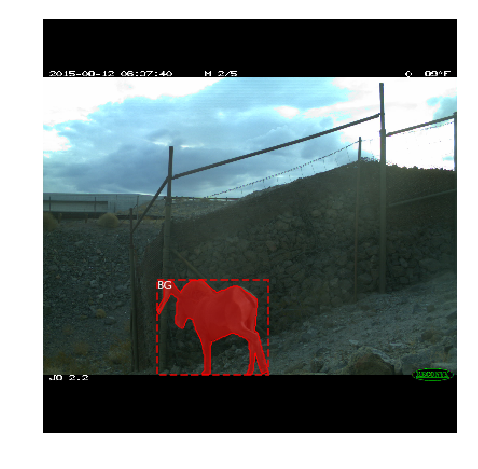

Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.47264  max:    1.30553  float32


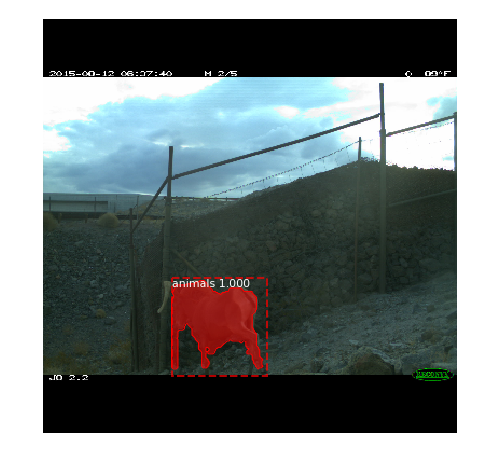

In [82]:
image_id = random.choice(valid_dataset.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

image = visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            train_dataset.class_names, figsize=(8, 8))

results = model_pred.detect([original_image], verbose=1)

r = results[0]
image = visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            valid_dataset.class_names, r['scores'], ax=get_ax())

In [32]:
MODEL_DIR

'/models/Mask_RCNN/logs'

In [ ]:
pwd

In [ ]:
inference_config